In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [4]:
dict_country = {'Country':['USA','Canada','France','UK','Germany','Austrelia'],
                'Lattitude':[44.97,62.40,46.75,54.01,51.15,-25.45],
                'Longitude':[-103.77,-96.80,2.40,-2.53,10.40,133.11],
                'Language':['English','Canadian','French0','English','German','English']}

df=pd.DataFrame(dict_country)
df

,Country,Lattitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,Canadian
2,France,46.75,2.40,French0
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Austrelia,-25.45,133.11,English


In [5]:
# df.to_csv('Country_clusters.csv')

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lattitude', ylabel='Longitude'>

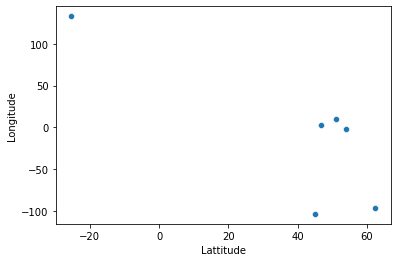

In [6]:
sns.scatterplot(df['Lattitude'],df['Longitude'])

In [7]:
x = df[['Lattitude','Longitude']]
x

,Lattitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [9]:
std_scalar= StandardScaler()
x_scaled = std_scalar.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)
x

,Lattitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


### model Training

In [10]:
kmeans_model= KMeans(n_clusters=3)
kmeans_model.fit(x)


KMeans(n_clusters=3)

In [11]:
wcss= kmeans_model.inertia_
wcss

0.22487761024739528

In [12]:
y_pred=kmeans_model.fit_predict(x)
y_pred

array([2, 2, 0, 0, 0, 1])

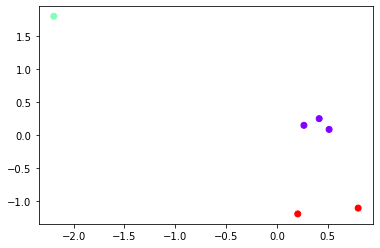

In [13]:
plt.scatter(x['Lattitude'],x['Longitude'],c=y_pred,cmap='rainbow')

In [14]:
kmeans_model.cluster_centers_

array([[ 0.39738895,  0.16401816],
       [-2.19463851,  1.80593003],
       [ 0.50123584, -1.14899226]])

In [26]:

wcss_list = []
silhouette_score_list=[]
for k in range(1,7):
    kmeans_model_new=KMeans(n_clusters=k)
    kmeans_model_new.fit(x)
    wcss_value= kmeans_model_new.inertia_
    wcss_list.append(wcss_value)
    print(f'for k == {k}, wcss is { wcss_value }')
    
    
wcss_list

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for k == 1, wcss is 12.000000000000002
for k == 2, wcss is 2.306614239650664
for k == 3, wcss is 0.22487761024739528
for k == 4, wcss is 0.04469440405562376
for k == 5, wcss is 0.016363388749074958
for k == 6, wcss is 0.0


[12.000000000000002,
 2.306614239650664,
 0.22487761024739528,
 0.04469440405562376,
 0.016363388749074958,
 0.0]

In [29]:
silhouette_score_list=[]
for k in range(2,6):
    kmeans_model_new=KMeans(n_clusters=k)
    y_pred_new=kmeans_model_new.fit_predict(x)
    silhouette_coefficient=silhouette_score(x,y_pred_new)
    silhouette_score_list.append(silhouette_coefficient)
    print(f'for k == {k},& silhouette score is {silhouette_coefficient}')
    
silhouette_score_list

for k == 2,& silhouette score is 0.6085613412443698
for k == 3,& silhouette score is 0.6080096531702182
for k == 4,& silhouette score is 0.42079618158679155
for k == 5,& silhouette score is 0.05686042220603446


[0.6085613412443698,
 0.6080096531702182,
 0.42079618158679155,
 0.05686042220603446]

Text(1.0, 1.0, 'Elbow Curve')

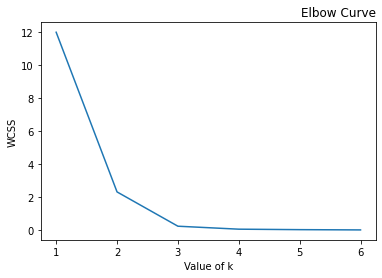

In [20]:
k=range(1,7)
plt.plot(k,wcss_list)
plt.xlabel('Value of k')
plt.ylabel('WCSS')
plt.title('Elbow Curve',loc='right')

Text(1.0, 1.0, 'Silhoutte score')

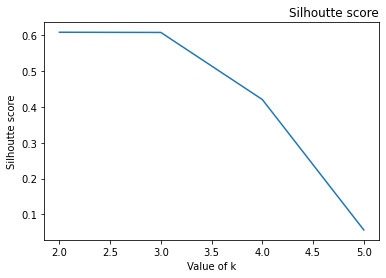

In [31]:
k=range(2,6,1)
plt.plot(k,silhouette_score_list)
plt.xlabel('Value of k')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte score',loc='right')